# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [51]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [52]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную сеть можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{1}{n}\cdot\frac{\partial \big(Y_i - \widehat{y}(X_i)\big)^2}{\partial \widehat{y}(X_i)} = \frac{2}{n}\left(\widehat{y}(X_i)-Y_i\right)$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \frac{\partial \big(w_{21}u_1(X_i)+w_{22}u_2(X_i)+b_2\big)}{\partial w_{2h}} = u_h(X_i) = \sigma(w_{1h}X_i+b_{1h})$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \frac{\partial \big(w_{21}u_1(X_i)+w_{22}u_2(X_i)+b_2\big)}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \frac{\partial \big(w_{21}u_1(X_i)+w_{22}u_2(X_i)+b_2\big)}{\partial u_h(X_i)} = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы в ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \frac{\partial (1+e^{-x})^{-1}}{\partial x} = \sigma(x)\big(1-\sigma(x)\big)$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \frac{\partial \big(\sigma(w_{1h}X_i + b_{1h})\big)}{\partial w_{1h}} = \sigma(w_{1h}X_i + b_{1h})\big(1-\sigma(w_{1h}X_i + b_{1h})\big)\cdot X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \frac{\partial \big(\sigma(w_{1h}X_i + b_{1h})\big)}{\partial b_{1h}} = \sigma(w_{1h}X_i + b_{1h})\big(1-\sigma(w_{1h}X_i + b_{1h})\big)$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Если обучающая выборка нейронной сети будет очень большая, то может возникнуть проблема с вычислительной сложностью обучения. В этом случае следует брать на некоторых подмножествах выборки(например, рандомно их выбирать). Тогда процесс обучения и обновления параметров станет менее затратным, но никакая часть выборки не будет детерминированно игнорироваться. Описанное выше в курсе уже проходилось - это принцип работы стохастического градиентного спуска.

**Вывод:**
Немного матана -- и вот все необходимые данные для применения метода градиентного спуска при обновлении параметров нейронной сети получены. Далее я напрямую использую уже полученные формулы в вычислениях. Я не буду использовать стохастический градиентный спуск, потому что для примера из условия вычислительная нагрузка не велика.

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [53]:
import numpy as np


def sigmoid(x):
    '''
    Сигмоида
    '''
    return 1 / (1 + np.exp(-x))


def d_sigmoid(x):
    '''
    Производная сигмоиды
    '''
    return sigmoid(x) * (1 - sigmoid(x))


class TwoNeuronNetwork:
    def __init__(self):
        '''
        Дефолтная инициализация случайными параметрами
        '''
        self.w11 = np.random.rand()
        self.w12 = np.random.rand()
        self.b11 = np.random.rand()
        self.b12 = np.random.rand()
        self.w21 = np.random.rand()
        self.w22 = np.random.rand()
        self.b2  = np.random.rand()


    def forward(self, x):
        '''
        Вычисление результата работы нейросети для каждого элемента выборки x
        '''
        n = x.shape[0]
        u1 = sigmoid(self.w11 * x + self.b11)
        u2 = sigmoid(self.w12 * x + self.b12)
        row_b = (np.ones(n) * self.b2).reshape(n, 1)
        output = (u1 * self.w21 + u2 * self.w22) + row_b
        return output


    def train(self, X, Y, learning_rate=0.01, iterations=100):
        '''
        Обучение нейросети (по принципу градиентного спуска)
        X - выборка аргументов
        Y - набор значений функции на данных аргументах
        learning_rate - шаг градиентного спуска
        iterations - количество итераций обучения
        '''
        n = X.shape[0]
        for it in range(iterations):
            # вычислим результат и обратным ходом градиентного спуска
            # обновим параметры нейросети
            y = self.forward(X)

            # Calculating derivatives

            # Second layer
            dMSE_dy = 2 * (y - Y) / n
            dy_dw21 = sigmoid(self.w11 * X + self.b11)
            dy_dw22 = sigmoid(self.w12 * X + self.b12)
            dy_db2 = 1

            dy_du1 = self.w21
            dy_du2 = self.w22

            dMSE_dw21 = np.dot(dMSE_dy.transpose(), dy_dw21)
            dMSE_dw22 = np.dot(dMSE_dy.transpose(), dy_dw22)
            dMSE_db2  = dMSE_dy.transpose()

            #first layer
            dMSE_du1 = dy_du1 * dMSE_dy
            dMSE_du2 = dy_du2 * dMSE_dy

            du1_dw11 = d_sigmoid(self.w11 * X + self.b11) * X
            du2_dw12 = d_sigmoid(self.w12 * X + self.b12) * X

            du1_db11 = d_sigmoid(self.w11 * X + self.b11)
            du2_db12 = d_sigmoid(self.w12 * X + self.b12)

            dMSE_dw11 = np.dot(dMSE_du1.transpose(), du1_dw11)
            dMSE_dw12 = np.dot(dMSE_du2.transpose(), du2_dw12)

            dMSE_db11 = np.dot(dMSE_du1.transpose(), du1_db11)
            dMSE_db12 = np.dot(dMSE_du2.transpose(), du2_db12)


            # Updating weights and b
            self.w11 -= learning_rate * dMSE_dw11
            self.w12 -= learning_rate * dMSE_dw12
            self.w21 -= learning_rate * dMSE_dw21
            self.w22 -= learning_rate * dMSE_dw22
            self.b11 -= learning_rate * dMSE_db11
            self.b12 -= learning_rate * dMSE_db12
            self.w22 -= learning_rate * dMSE_dw22
            self.b2  -= learning_rate * dMSE_db2

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [54]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
Y = np.power(X, 3)

X_test = sps.norm.rvs(size=(sample_size, 1))
Y_test = np.power(X_test, 3)

assert Y.shape == (sample_size, 1)
assert Y_test.shape == (sample_size, 1)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`.

In [55]:
network = TwoNeuronNetwork()
network.train(X=X, Y=Y, iterations=10)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

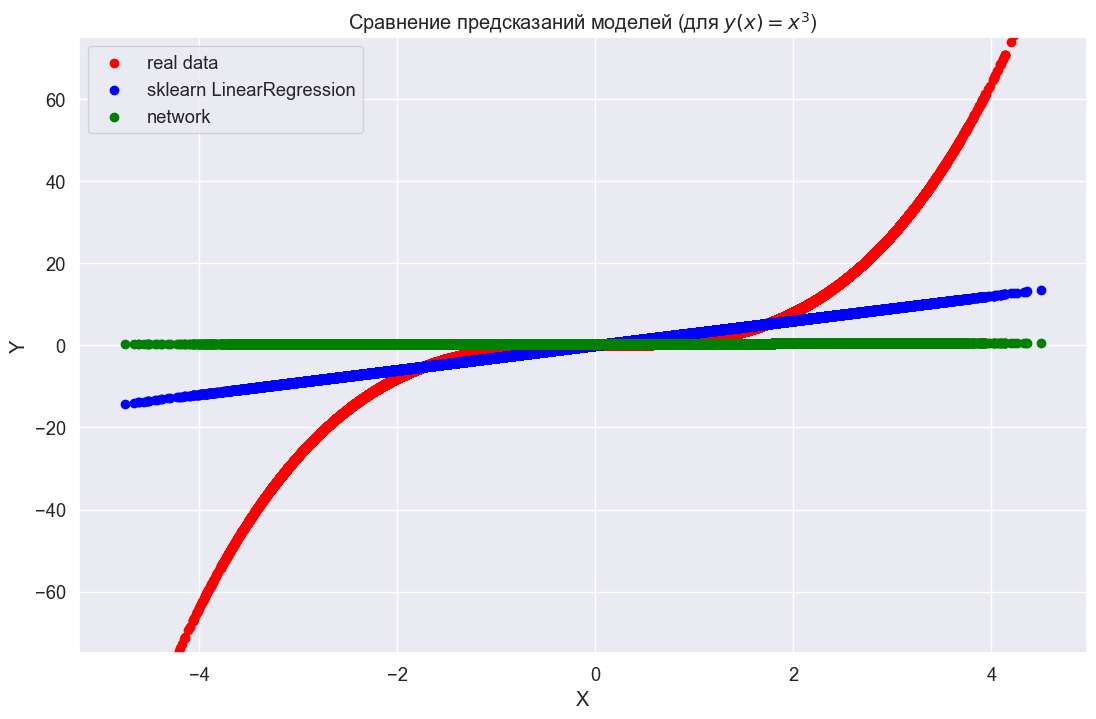

In [56]:
plt.figure(figsize=(13, 8))
plt.scatter(x=X_test, y=Y_test, label='real data', color='red')
plt.scatter(x=X_test, y=reg.predict(X_test), label='sklearn LinearRegression', color='blue')
plt.scatter(x=X_test, y=network.forward(X_test), label='network', color='green')

plt.title('Сравнение предсказаний моделей ($Y = X^3$)')
plt.ylabel('Y')
plt.xlabel('X')
plt.ylim(-75, 75)
plt.legend(loc='upper left');

Повторите вычисления для другой нелинейной функции $y(x)$.

In [57]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
Y = np.power(X, 4) + np.power(X, 3) + 0.1 * X

X_test = sps.norm.rvs(size=(sample_size, 1))
Y_test = np.power(X_test, 4) + np.power(X_test, 3) + 0.1 * X_test

assert Y.shape == (sample_size, 1)
assert Y_test.shape == (sample_size, 1)

Обучим модели:

In [58]:
network = TwoNeuronNetwork()
network.train(X=X, Y=Y, iterations=10)
reg = LinearRegression().fit(X, Y)

Визуализируем предсказания моделей:

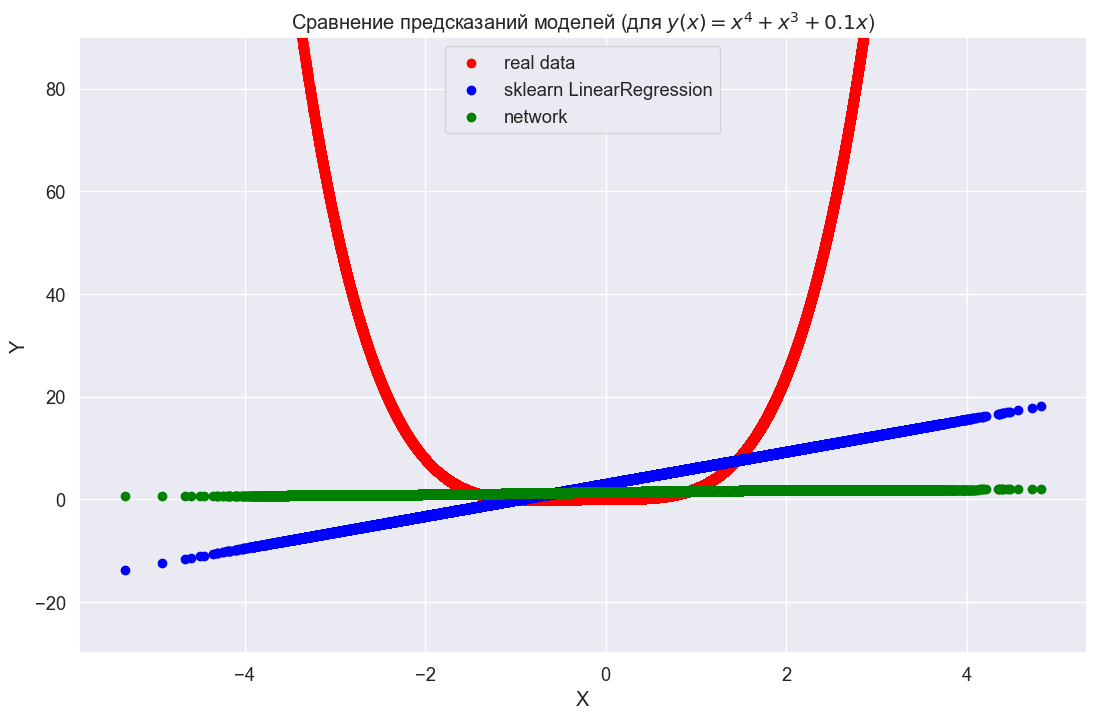

In [59]:
plt.figure(figsize=(13, 8))
plt.scatter(x=X_test, y=Y_test, label='real data', color='red')
plt.scatter(x=X_test, y=reg.predict(X_test), label='sklearn LinearRegression', color='blue')
plt.scatter(x=X_test, y=network.forward(X_test), label='network', color='green')

plt.title('Сравнение предсказаний моделей ($Y = X^4 + X^3 + 0.1X$)')
plt.ylabel('Y')
plt.xlabel('X')
plt.ylim(-50, 100)
plt.legend(loc='upper center');

**Вывод:**
Написанный класс двухнейронной нейросети в сравнении с моделью LinearRegression библиотеки sklearn неплохо аппроксимирует данные выборки. Результат предсказания получается менее точным, но того стоило ожидать, работая с такой маленькой по размеру нейронной сетью. При увеличении количества нейронов и сложности функций активации результат станет точнее.

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.

**Вывод:**
...